In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

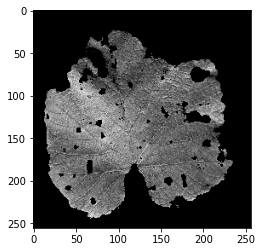

In [3]:
image = cv2.imread("anggur.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, 'gray')

In [4]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

In [5]:
def getPadding(image, kernel):
    i = (kernel.shape[1]-1)//2
    j = (kernel.shape[0]-1)//2
    kiri = i
    kanan = (kernel.shape[1]-1)-i
    atas = j
    bawah = (kernel.shape[0]-1)-j

    result = np.pad(image, ((atas, bawah), (kiri, kanan)), 'constant')
    return result

In [6]:
def threshold(image):
    # result = image
    result = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if(image[i,j] > 0.5):
                result[i,j] = 255
            elif(image[i,j] <= 0.5):
                result[i,j] = 0
    return result

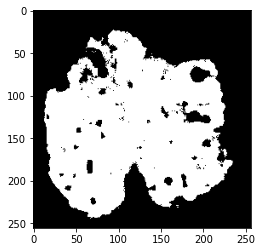

In [7]:
imgThres = threshold(image)
plt.imshow(imgThres, 'gray')

#### Operasi Dilasi

In [8]:
def dilasi(image, kernel):
   height, width = image.shape
   imagePad = getPadding(image, kernel)
   result = np.zeros((height, width))
   for i in range(height):
      for j in range(width):
         if np.sum(kernel * imagePad[i:i+kernel.shape[0], j:j+kernel.shape[1]]) > 0:
            result[i, j] = 255
   return result

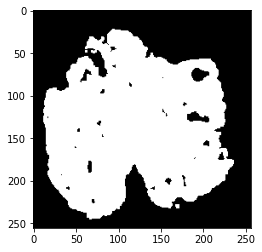

In [9]:
dilasiResult = threshold(image)
dilasiResult = dilasi(dilasiResult, kernel)
plt.imshow(dilasiResult, 'gray')

#### Operasi Erosi

In [10]:
def erosi(image, kernel):
   height, width = image.shape
   imagePad = getPadding(image, kernel)
   result = np.zeros((height, width))
   for i in range(height):
      for j in range(width):
         if np.all(kernel * imagePad[i:i+kernel.shape[0], j:j+kernel.shape[1]]):
            result[i, j] = 255
   return result

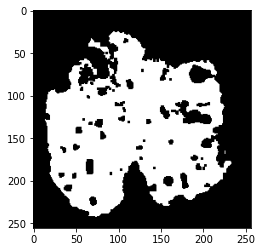

In [11]:
erosiResult = threshold(image)
erosiResult = erosi(erosiResult, kernel)
plt.imshow(erosiResult, 'gray')

In [12]:
def opening(image, kernel):
   imageErosi = erosi(image, kernel)
   result = dilasi(imageErosi, kernel)
   return result

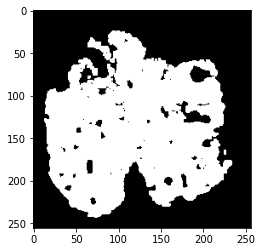

In [13]:
imageOpening = threshold(image)
imageOpening = opening(imageOpening, kernel)
plt.imshow(imageOpening, 'gray')

In [14]:
def closing(image, kernel):
   imageDilasi = dilasi(image, kernel)
   result = erosi(imageDilasi, kernel)
   return result

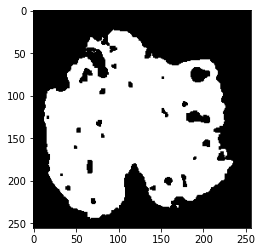

In [15]:
imageClosing = threshold(image)
imageClosing = closing(imageClosing, kernel)
plt.imshow(imageClosing, 'gray')